# House_Price_Prediction 추가

In [11]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [12]:
import os
                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the datasets.

In [14]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv"))

In [8]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"

train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
test = pd.read_csv(os.path.join(PATH, "test.csv")) # (9272, 51)
train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
train_test_final = pd.read_csv(os.path.join(PATH, "train_test_final.csv")) # 컬럼 추림
train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) # 
trainset = pd.read_csv(os.path.join(PATH, "trainset.csv")) # 
reconstruction = pd.read_csv(os.path.join(PATH, "reconstruction.csv"), encoding='CP949')
subway_feature = pd.read_csv(os.path.join(PATH, "subway_feature.csv"))
sample_submission = pd.read_csv(os.path.join(PATH, "sample_submission.csv"))
bus_feature = pd.read_csv(os.path.join(PATH, "bus_feature.csv"))
seoul_apart = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv")
seoul_apart_jimi = pd.read_excel(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/서울시 공동주택 관리 현황 (2023.12.31.기준)_수정본.xlsx')
reconstruction_modified = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction_modified.csv", encoding='CP949')
# 출처: https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do 서울시 공동주택 아파트 정보
doroaddress = pd.read_csv(os.path.join(PATH, "doroaddress.csv")) # (8325, 7)
bunjiaddress = pd.read_csv(os.path.join(PATH, "bunjiaddress.csv")) # (8954, 1) 
# 출처: https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressTransform 100만건 이하 주소전환
station_distance = pd.read_csv(os.path.join(PATH, "station_distance.csv"))
# match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (599943, 38)
match_build_seoul_for_model = pd.read_csv(os.path.join(PATH, "match_build_seoul_for_model.csv")) # (31377, 7)
finance = pd.read_csv(os.path.join(PATH, "finance.csv"))
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv"))

/tmp/ipykernel_398334/2026510629.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
/tmp/ipykernel_398334/2026510629.py:5: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
/tmp/ipykernel_398334/2026510629.py:7: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) #


# EDA

### 층별에 따른 아파트 가격 차이가 없다.

In [484]:
show.층.unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [489]:
train_test.아파트명.unique()

array(['개포6차우성', '개포우성3차', '개포자이', ..., '히페리온리버팰리스', '세운푸르지오헤리시티',
       '힐스테이트세운센트럴1단지'], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_22368\3471685677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['계약년월일'] = pd.to_datetime(show['계약년월일'])  # 계약년월일을 datetime 객체로 변환


Text(0, 0.5, 'Target')

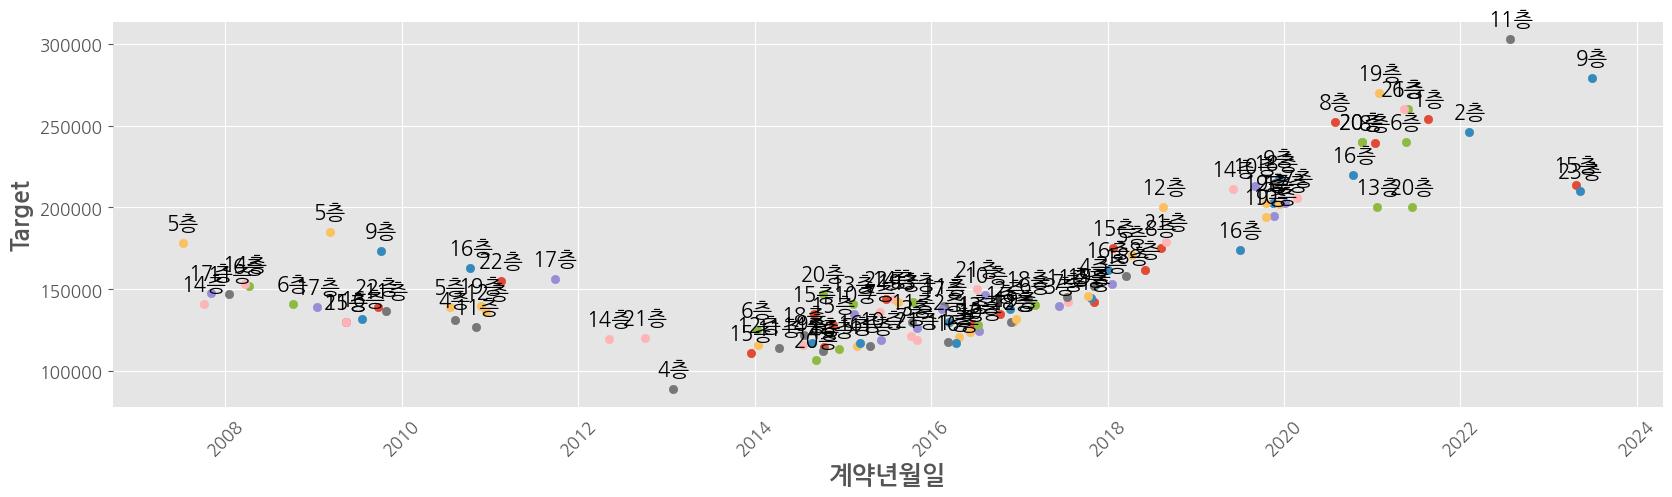

In [503]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 데이터 처리 부분
filtered = train_test[train_test.아파트명.str.contains('개포자이')==True]
show = filtered[['id', '계약년월일','target','is_test','층']]
show['계약년월일'] = pd.to_datetime(show['계약년월일'])  # 계약년월일을 datetime 객체로 변환

# 그래프 그리기 부분
plt.figure(figsize=(20, 5))

# 층별로 다른 색상과 선 스타일로 플롯
apartfloor = show.층.unique().max()
for floor in range(1, apartfloor + 1):  # 층 범위 수정: apartfloor + 1로 변경
    subset = show[(show.is_test == 0) & (show.층 == floor)]
    plt.scatter(subset['계약년월일'], subset['target'], label=f'층 {floor}')  # scatter로 변경

    # 각 데이터 포인트에 주석 추가
    for i in range(len(subset)):
        plt.annotate(f'{floor}층', (subset['계약년월일'].iloc[i], subset['target'].iloc[i]), 
                     textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)  # 그리드 활성화
plt.xticks(rotation=45)  # x축 레이블 회전
plt.xlabel('계약년월일')  # x축 레이블
plt.ylabel('Target')  # y축 레이블


### 구마다 아파트 평균 가격이 다르다

In [510]:
gu = train_test.구.unique()
gu

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [520]:
train_test.계약년월일.min()
train_test.계약년월일.max()

Timestamp('2023-09-26 00:00:00')

C:\Users\user\AppData\Local\Temp\ipykernel_22368\1761913101.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


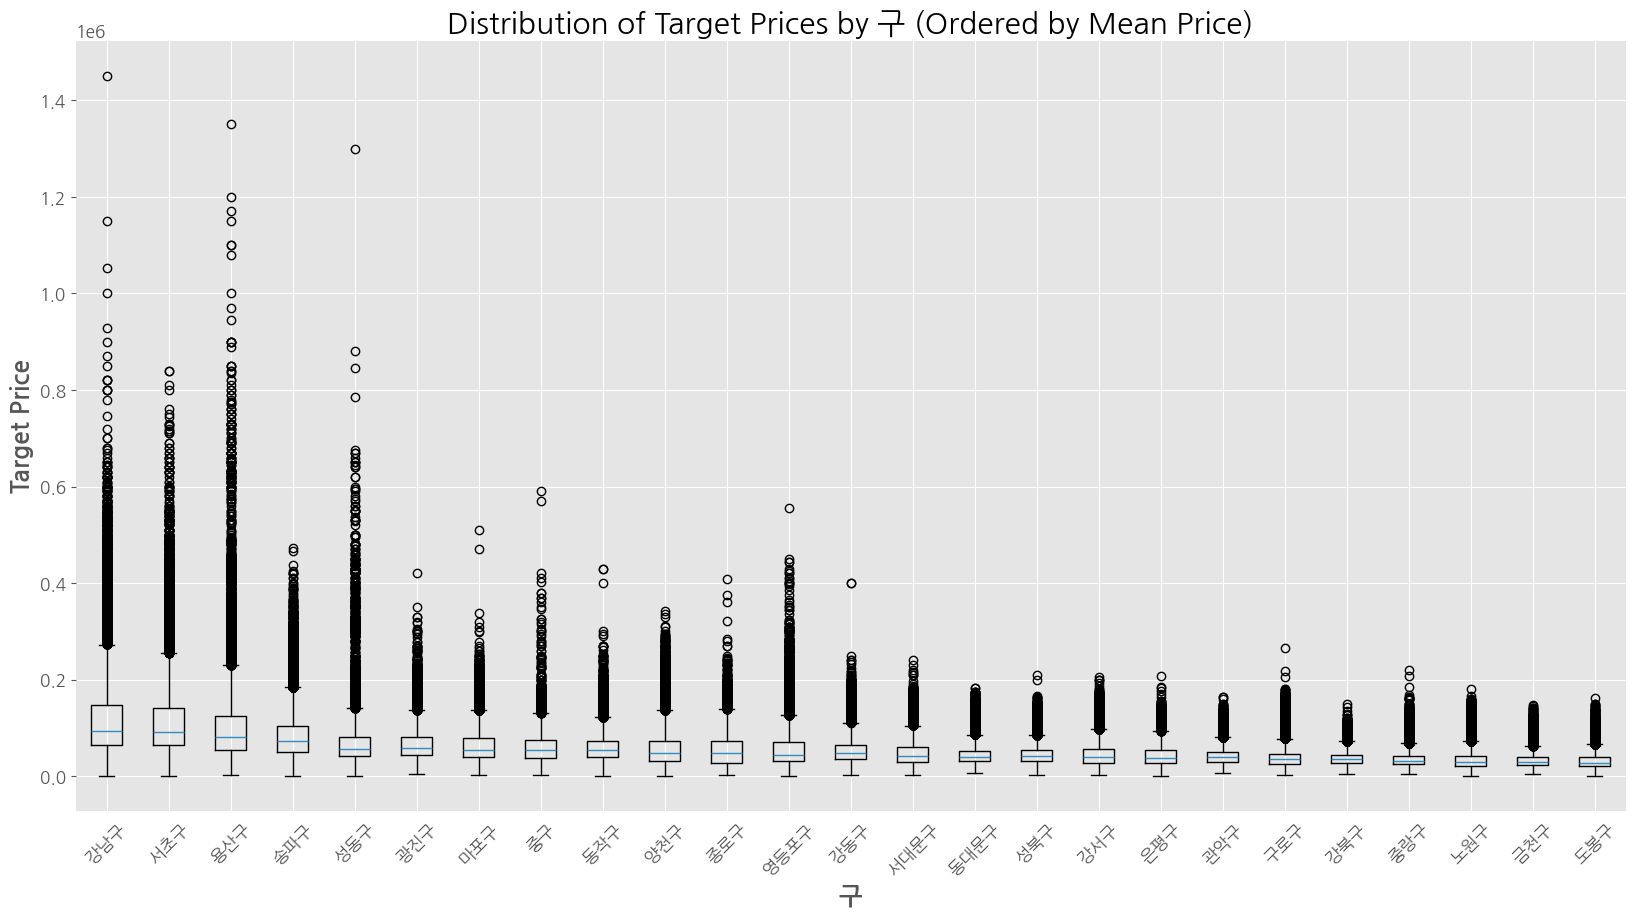

In [523]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
train_test['계약년월일'] = pd.to_datetime(train_test['계약년월일'])
filtered_df = train_test[(train_test['계약년월일'] >= '2007-01-01') & (train_test['계약년월일'] <= '2023-06-30')]

# '구'별로 평균 'target'을 계산하고 정렬
mean_targets = filtered_df.groupby('구')['target'].mean().sort_values(ascending=False)
sorted_gus = mean_targets.index  # 정렬된 '구' 목록

# 박스플롯 데이터 준비
boxplot_data = [filtered_df[filtered_df['구'] == gu]['target'] for gu in sorted_gus]

# 박스플롯 생성
plt.figure(figsize=(20, 10))
plt.boxplot(boxplot_data, labels=sorted_gus)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.xlabel('구')
plt.ylabel('Target Price')
plt.title('Distribution of Target Prices by 구 (Ordered by Mean Price)')
plt.grid(True)
plt.show()


/tmp/ipykernel_367271/1988999185.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


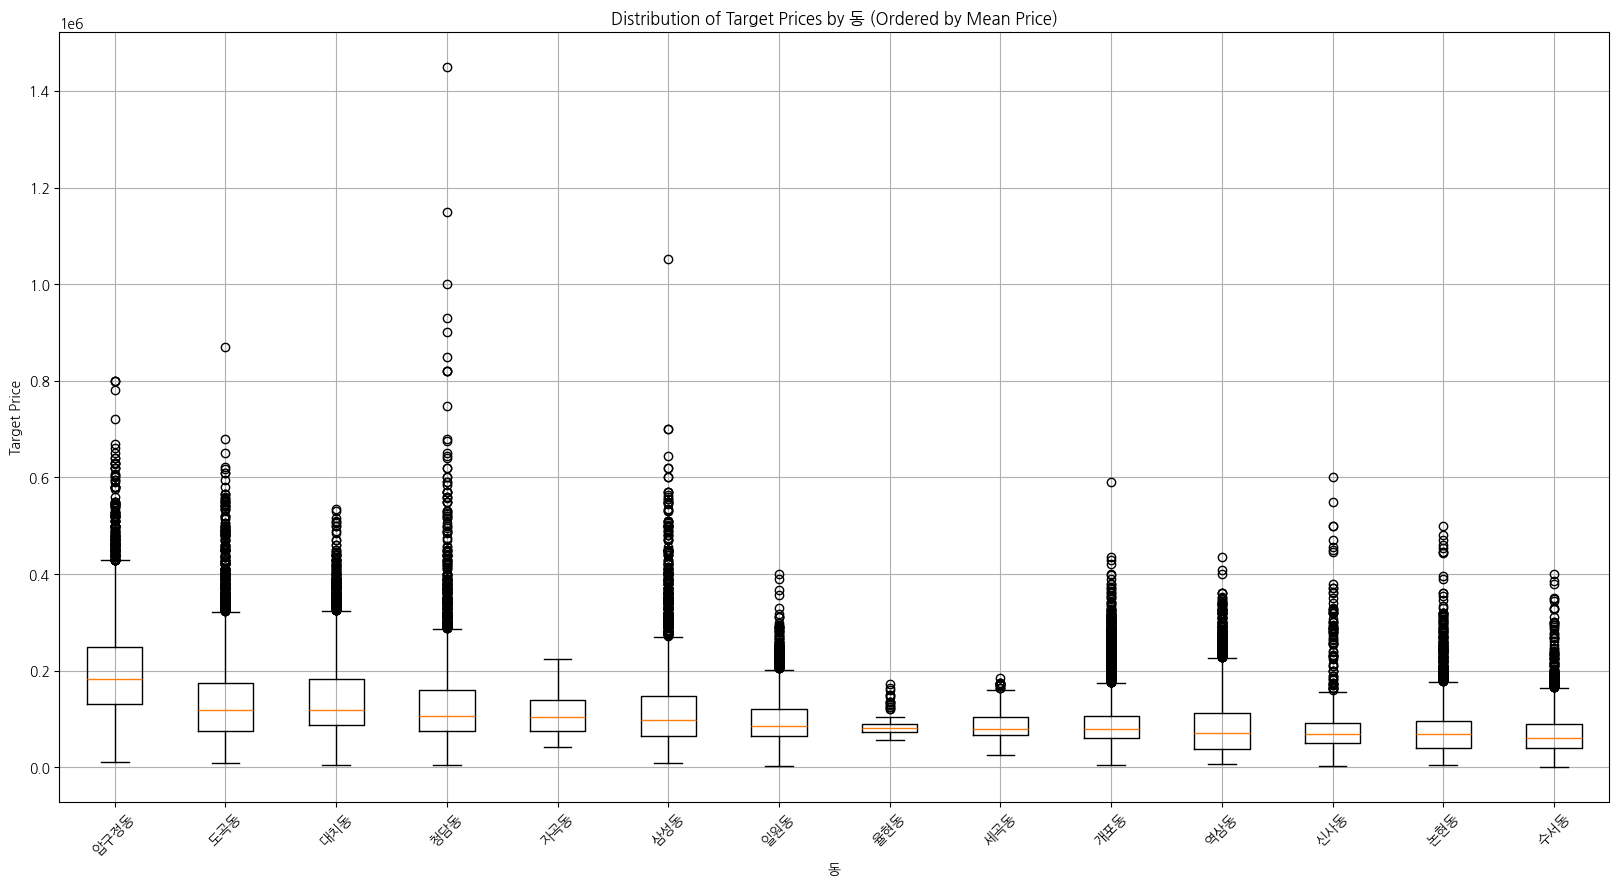

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
train_test['계약년월일'] = pd.to_datetime(train_test['계약년월일'])
filtered_df = train_test[(train_test['계약년월일'] >= '2007-01-01') & (train_test['계약년월일'] <= '2023-06-30')&(train_test['구']=='강남구')]

# '구'별로 평균 'target'을 계산하고 정렬
median_targets = filtered_df.groupby('동')['target'].median().sort_values(ascending=False)
sorted_gus = median_targets.index  # 정렬된 '구' 목록

# 박스플롯 데이터 준비
boxplot_data = [filtered_df[filtered_df['동'] == gu]['target'] for gu in sorted_gus]

# 박스플롯 생성
plt.figure(figsize=(20, 10))
plt.boxplot(boxplot_data, labels=sorted_gus)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.xlabel('동')
plt.ylabel('Target Price')
plt.title('Distribution of Target Prices by 동 (Ordered by Mean Price)')
plt.grid(True)
plt.show()


In [13]:
sorted_gus

Index(['강남구', '서초구', '용산구', '송파구', '광진구', '성동구', '동작구', '중구', '마포구', '양천구',
       '강동구', '종로구', '영등포구', '서대문구', '성북구', '동대문구', '관악구', '강서구', '은평구', '강북구',
       '구로구', '중랑구', '금천구', '노원구', '도봉구'],
      dtype='object', name='구')

/tmp/ipykernel_367271/2782269196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')
/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


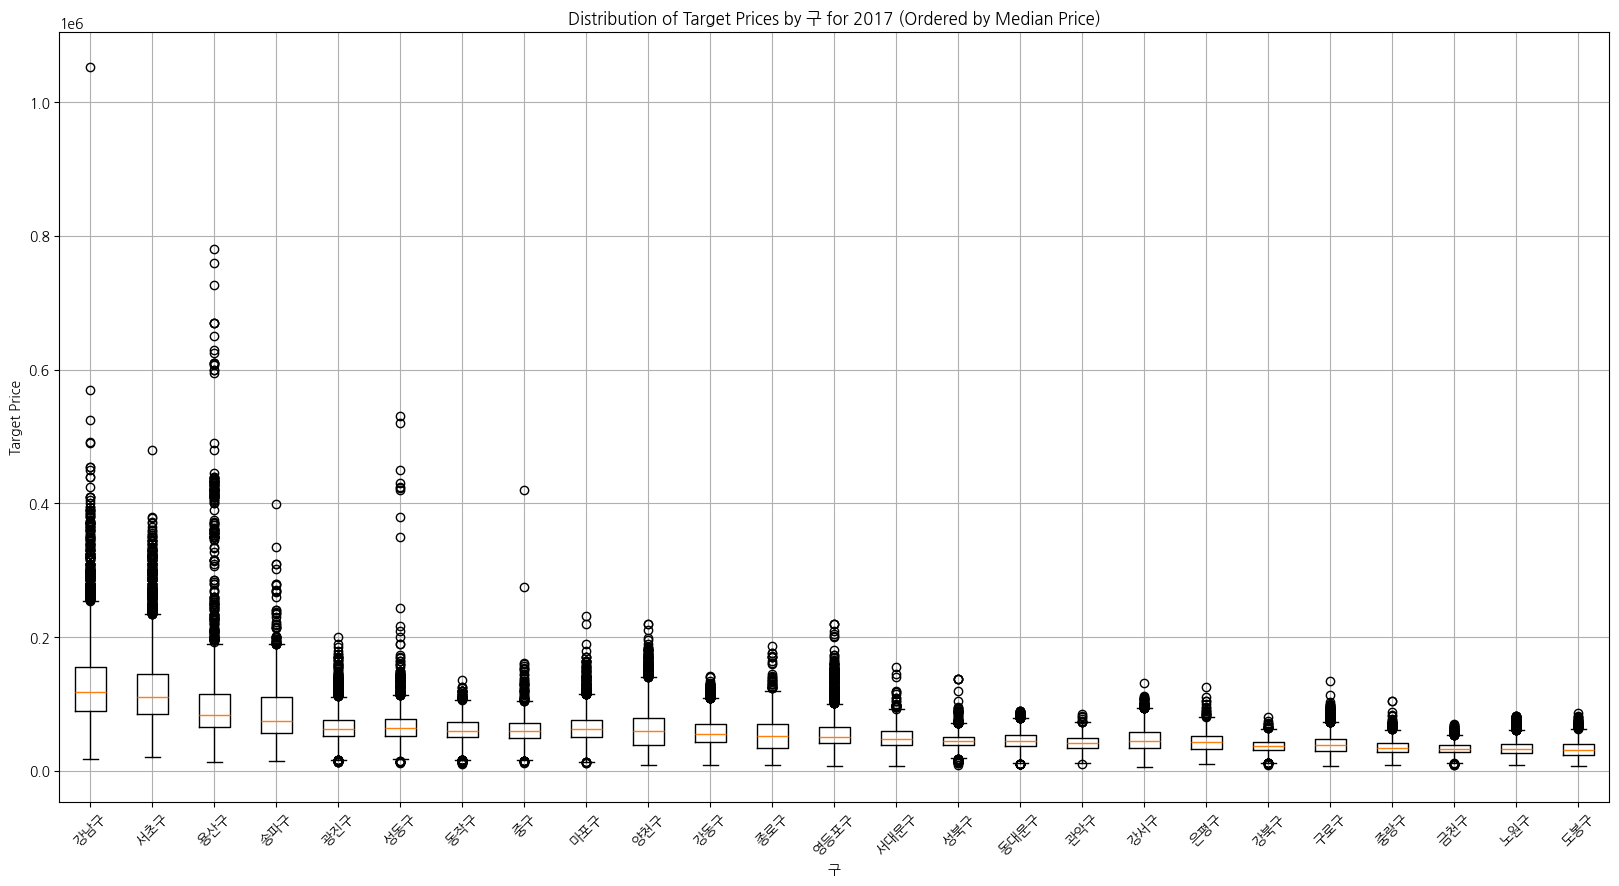

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


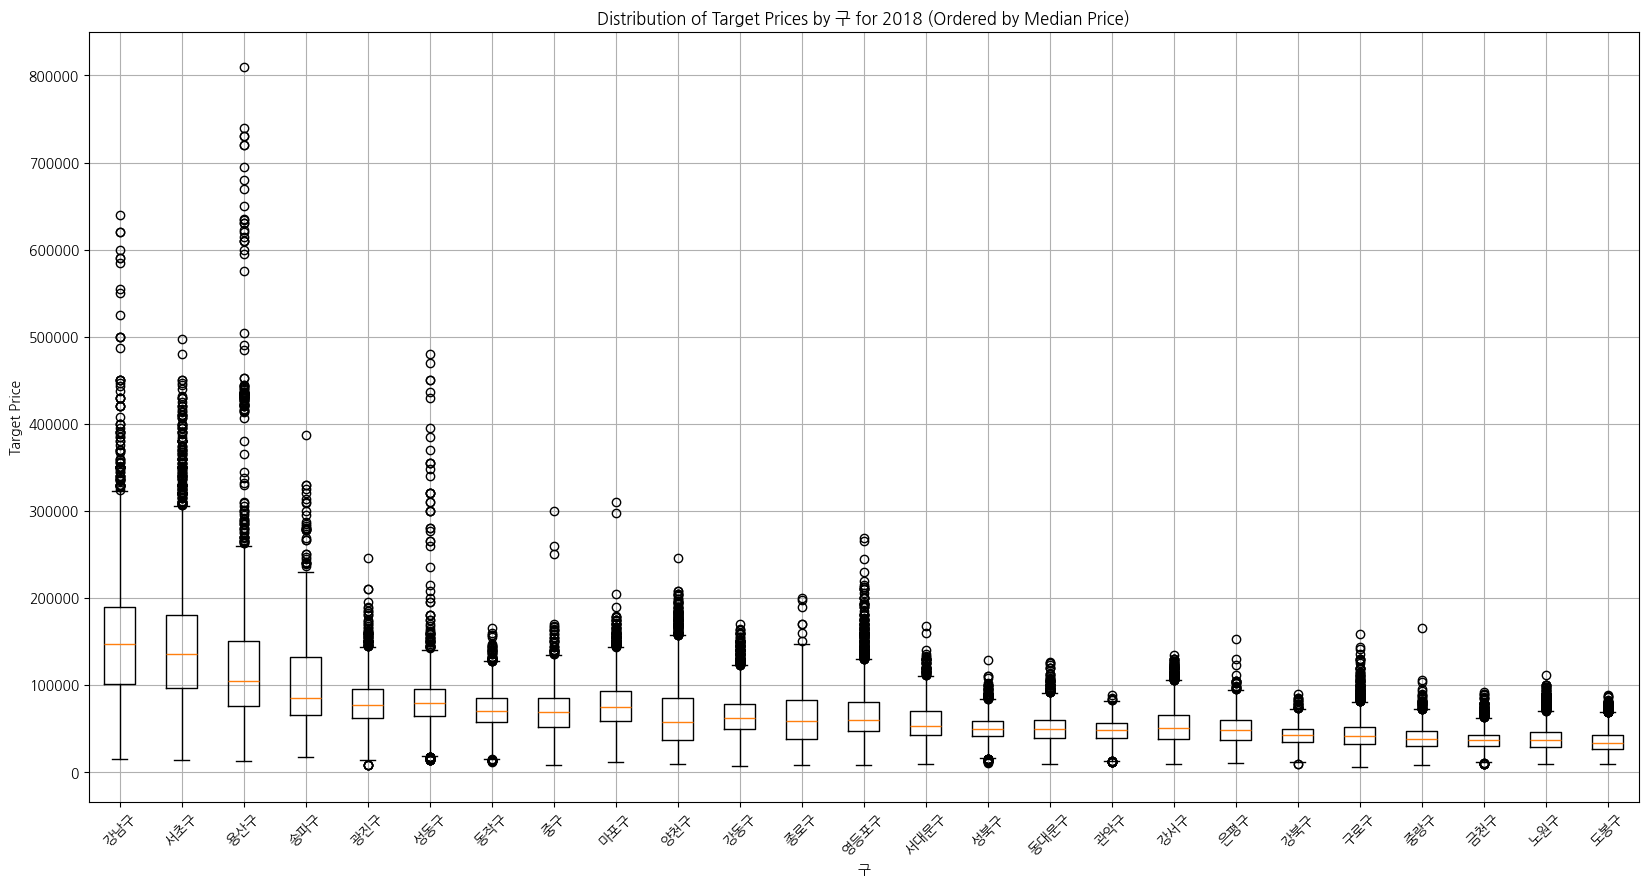

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


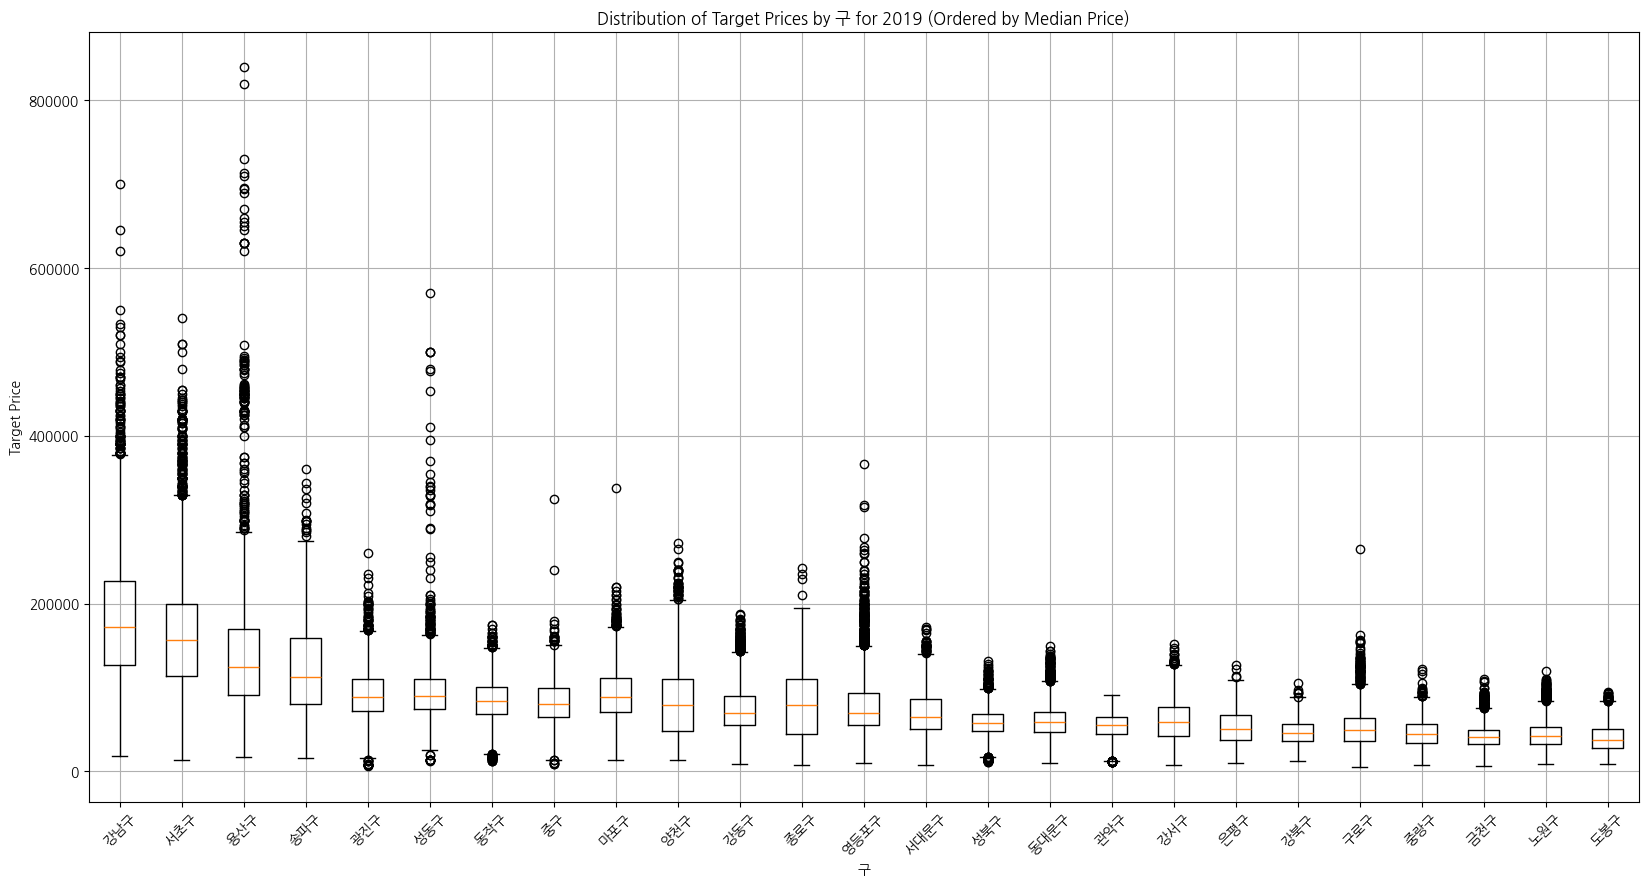

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


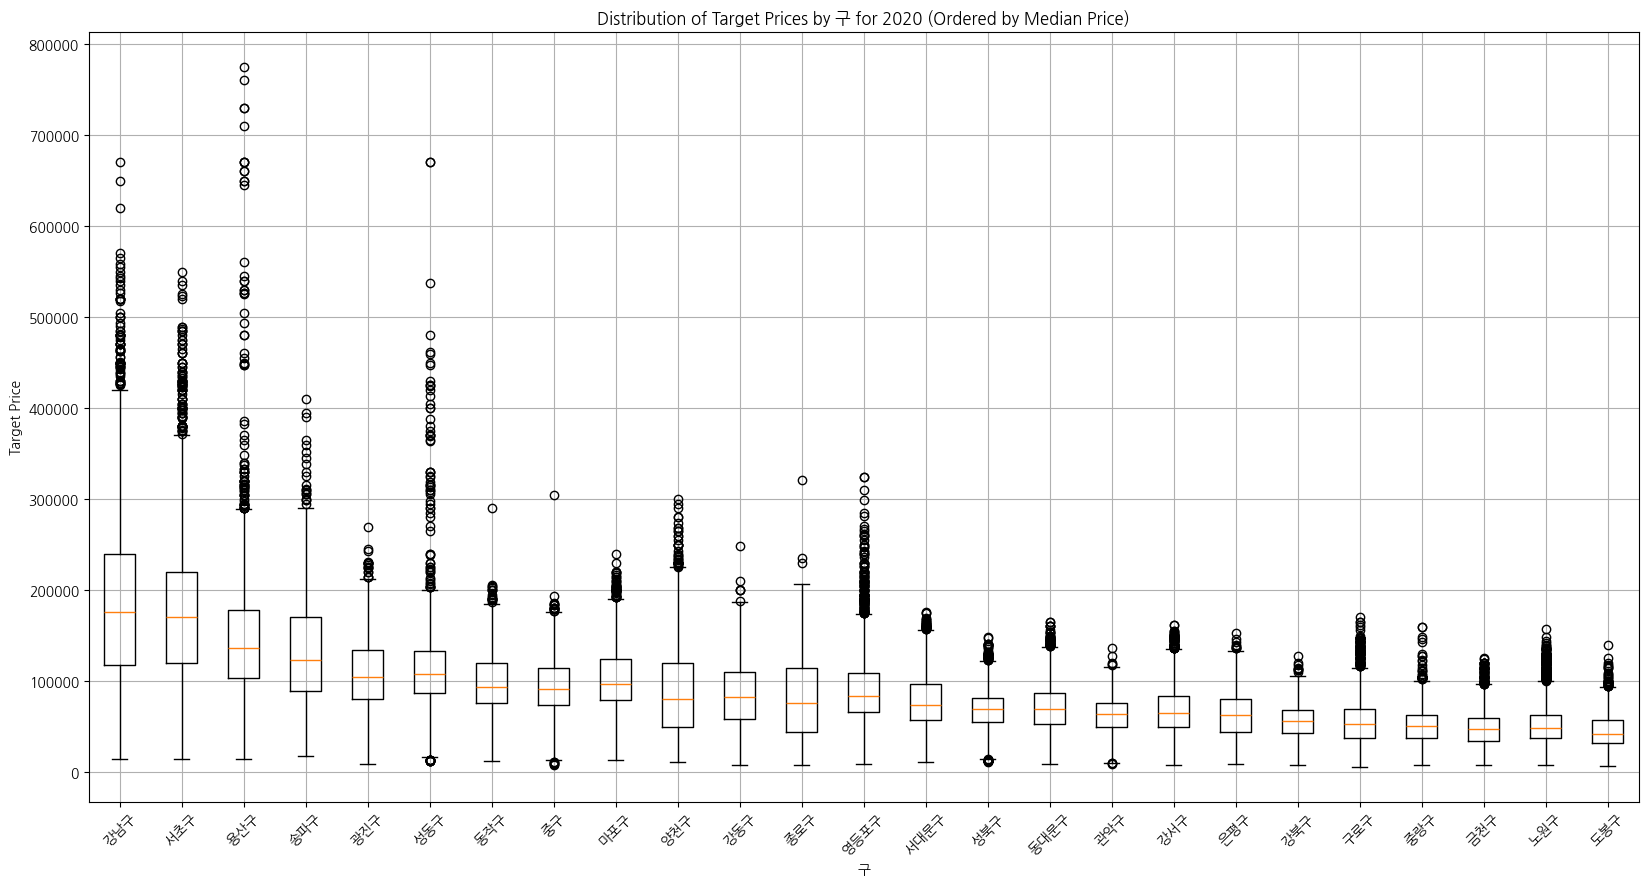

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


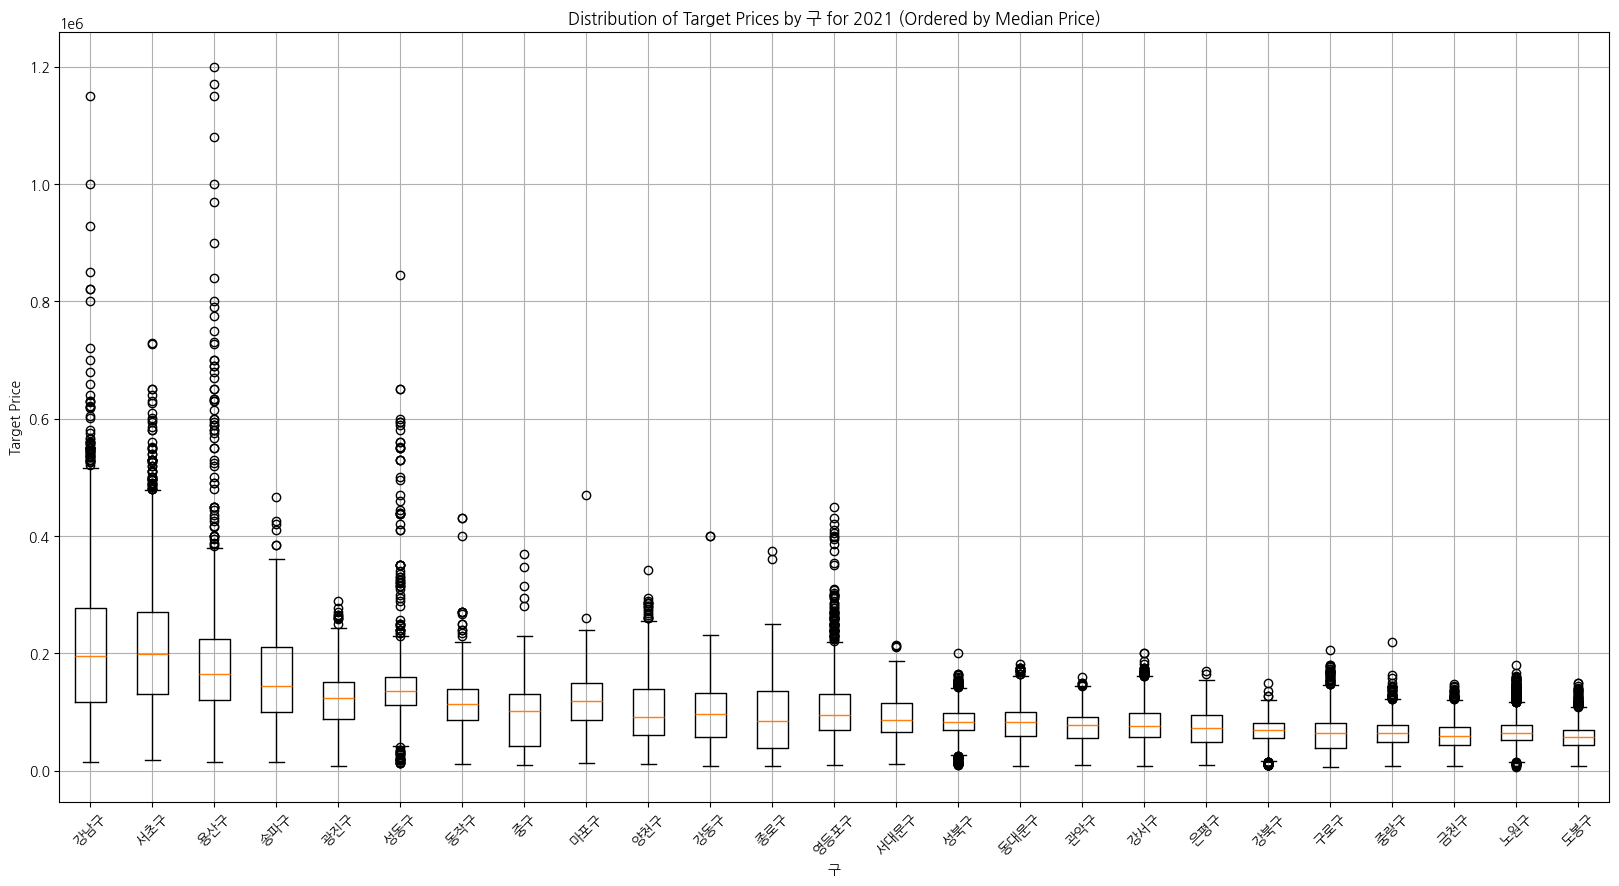

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


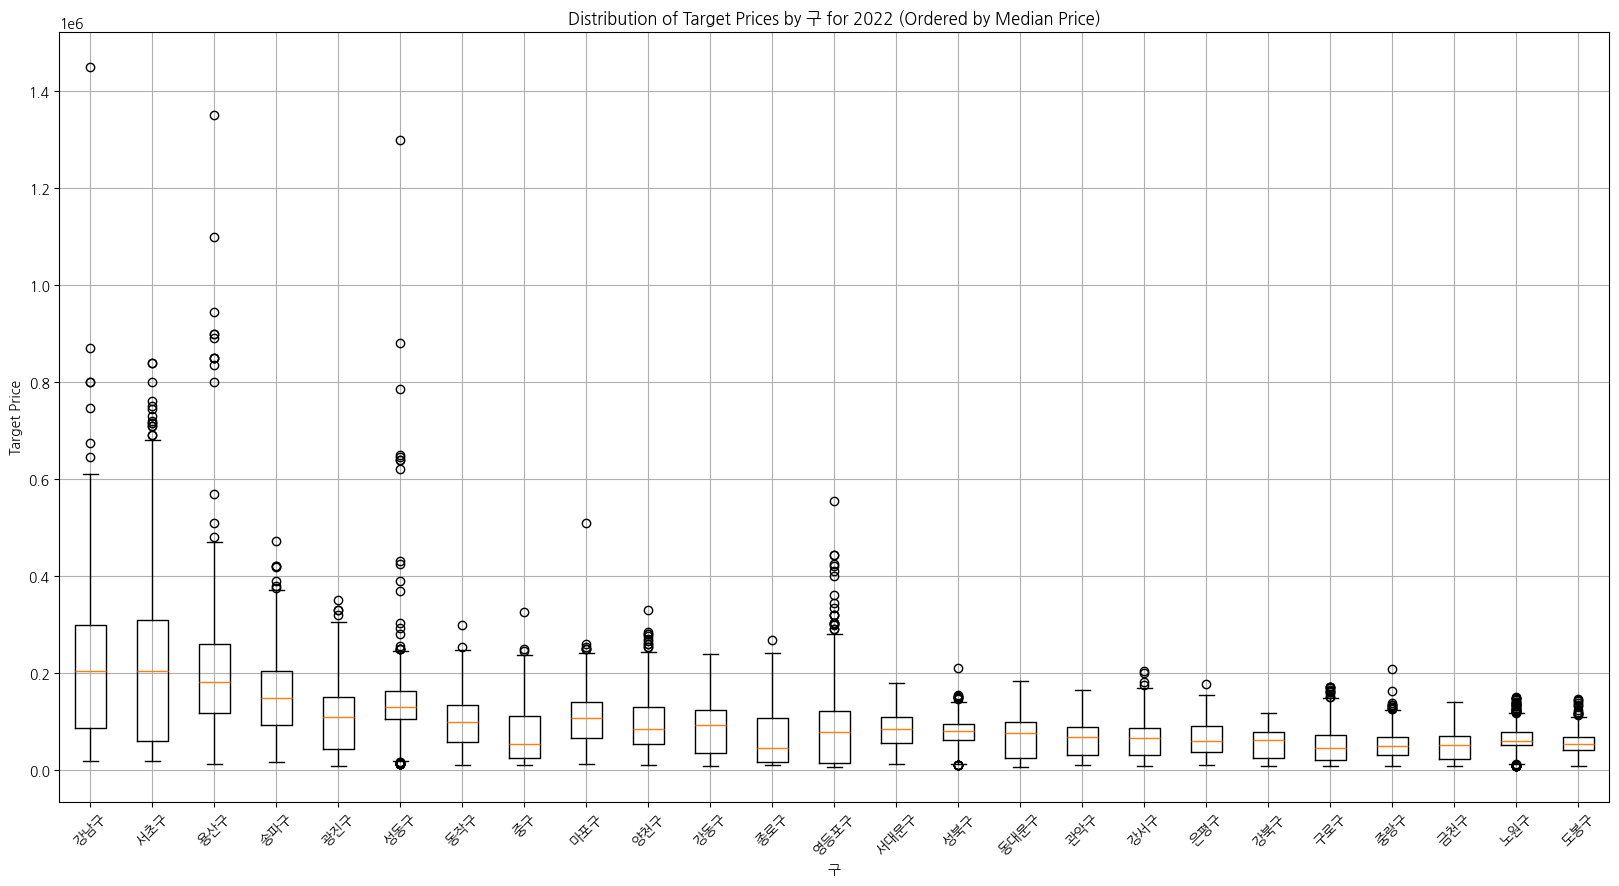

/tmp/ipykernel_367271/2782269196.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted_gus)


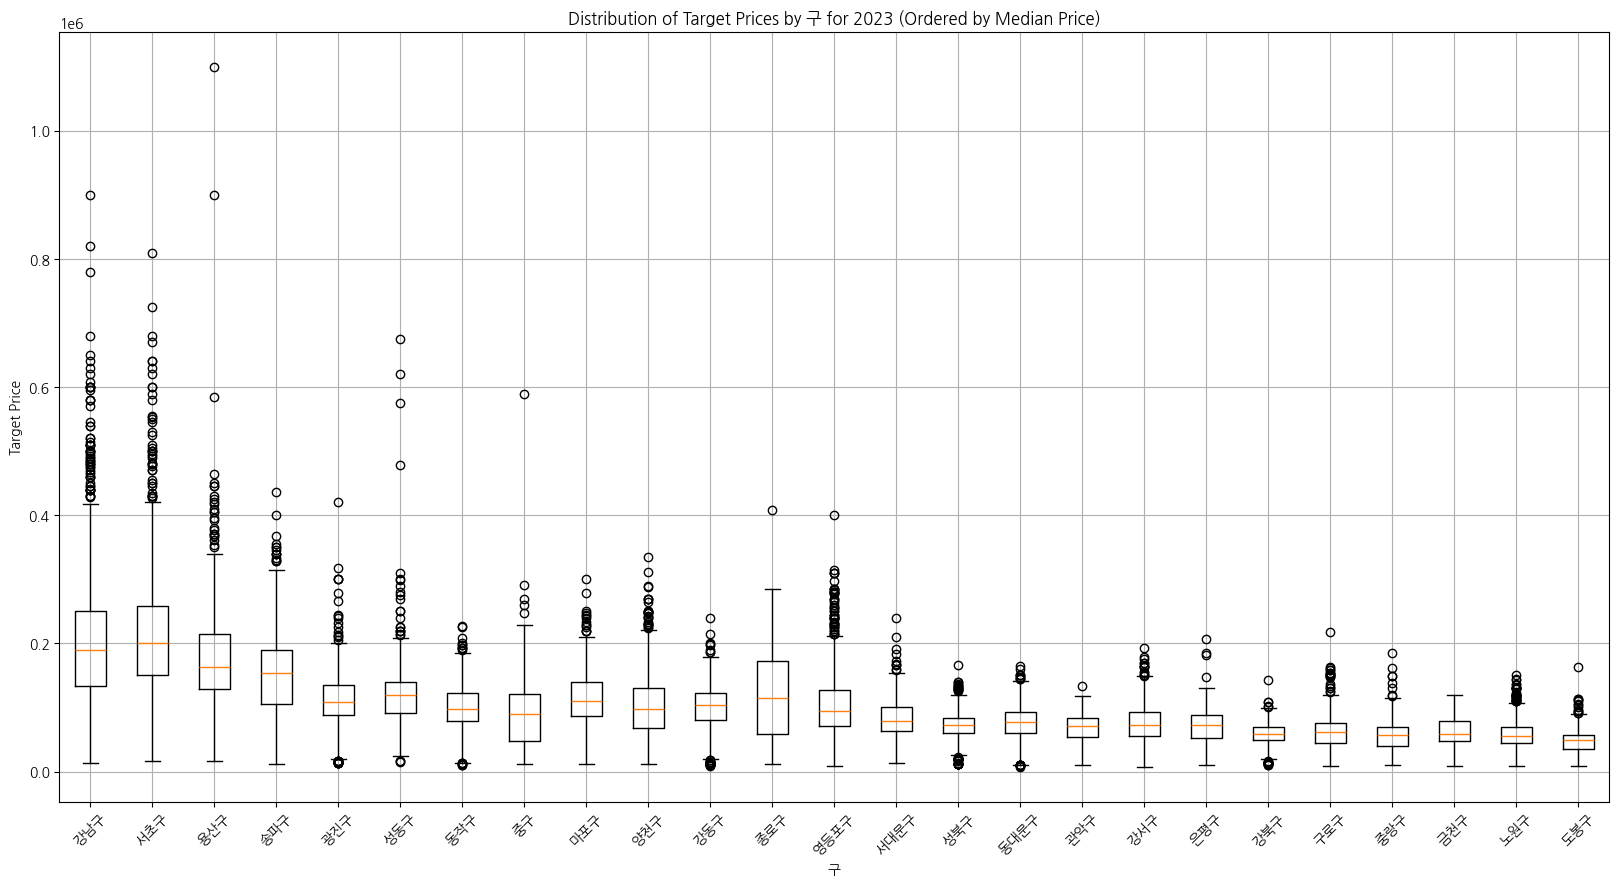

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = trainset_0714[trainset_0714['is_test']==0]

# 데이터 준비
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# '구'별로 평균 'target'을 계산하고 정렬
median_targets = df.groupby('구')['target'].median().sort_values(ascending=False)
sorted_gus = median_targets.index  # 정렬된 '구' 목록

# 각 연도별로 데이터 필터링 및 박스플롯 생성
start_year = 2017
end_year = 2023
for year in range(start_year, end_year + 1):
    year_df = df[(df['계약년월'].dt.year == year)]

    # 박스플롯 데이터 준비
    boxplot_data = [year_df[year_df['구'] == gu]['target'] for gu in sorted_gus]

    # 박스플롯 생성
    plt.figure(figsize=(20, 10))
    plt.boxplot(boxplot_data, labels=sorted_gus)
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.xlabel('구')
    plt.ylabel('Target Price')
    plt.title(f'Distribution of Target Prices by 구 for {year} (Ordered by Median Price)')
    plt.grid(True)
    plt.show()


# 컬럼의 '동'별로 그 해의 target값의 박스플랏 아웃라이어인 경우의 row를 알고 싶어

In [106]:
trainset_0714['건축년'] = pd.to_datetime(trainset_0714['건축년도']).dt.year

In [ ]:
import pandas as pd
import numpy as np

# '동'과 '연도'별로 그룹화하여 각 그룹의 아웃라이어 찾기
def find_outliers(group):
    q1 = group['target'].quantile(0.25)
    q3 = group['target'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['target'] < lower_bound) | (group['target'] > upper_bound)]

# 각 '동'과 '연도'별로 아웃라이어 필터링
outliers = trainset_0714.groupby(['동', '건축년']).apply(find_outliers).reset_index(drop=True)

print(outliers)


In [3]:
subset = outliers[outliers[['아파트명','번지주소','도로명주소']].duplicated()==True]

NameError: name 'outliers' is not defined

In [2]:
import pandas as pd

# 예시 데이터프레임 생성
# trainset_0714 = pd.DataFrame({'id': [1, 2, 3, 4, 5], 'data': ['A', 'B', 'C', 'D', 'E']})
# subset = pd.DataFrame({'id': [2, 4]})

# merge 함수를 사용하여 trainset_0714과 subset을 id 컬럼을 기준으로 조인합니다.
# how='left'는 왼쪽 데이터프레임(trainset_0714)의 키를 기준으로 조인을 수행합니다.
# indicator=True는 _merge라는 새로운 컬럼을 생성하여 조인 타입을 나타냅니다.
trainset_0714 = trainset_0714.merge(subset['아파트명'].to_frame(), on='아파트명', how='left', indicator=True)

# _merge 컬럼을 사용하여 is_in_subset 컬럼을 생성하고 조건에 따라 값 할당
trainset_0714['is_in_outlier'] = (trainset_0714['_merge'] == 'both').astype(int)

# _merge 컬럼은 더 이상 필요하지 않으므로 삭제합니다.
trainset_0714.drop(columns=['_merge'], inplace=True)

# 결과 출력
print(trainset_0714)


NameError: name 'trainset_0714' is not defined

# prep --> 버전 안맞아서 실패

In [19]:
from dataprep.eda import create_report

df=trainset_0714[trainset_0714['is_test']==0]

report = create_reportdf(df)
report.save('trainset_0714.html')
report.show_browser()
report.show()

AttributeError: module 'numpy' has no attribute 'bool8'

# 결측치

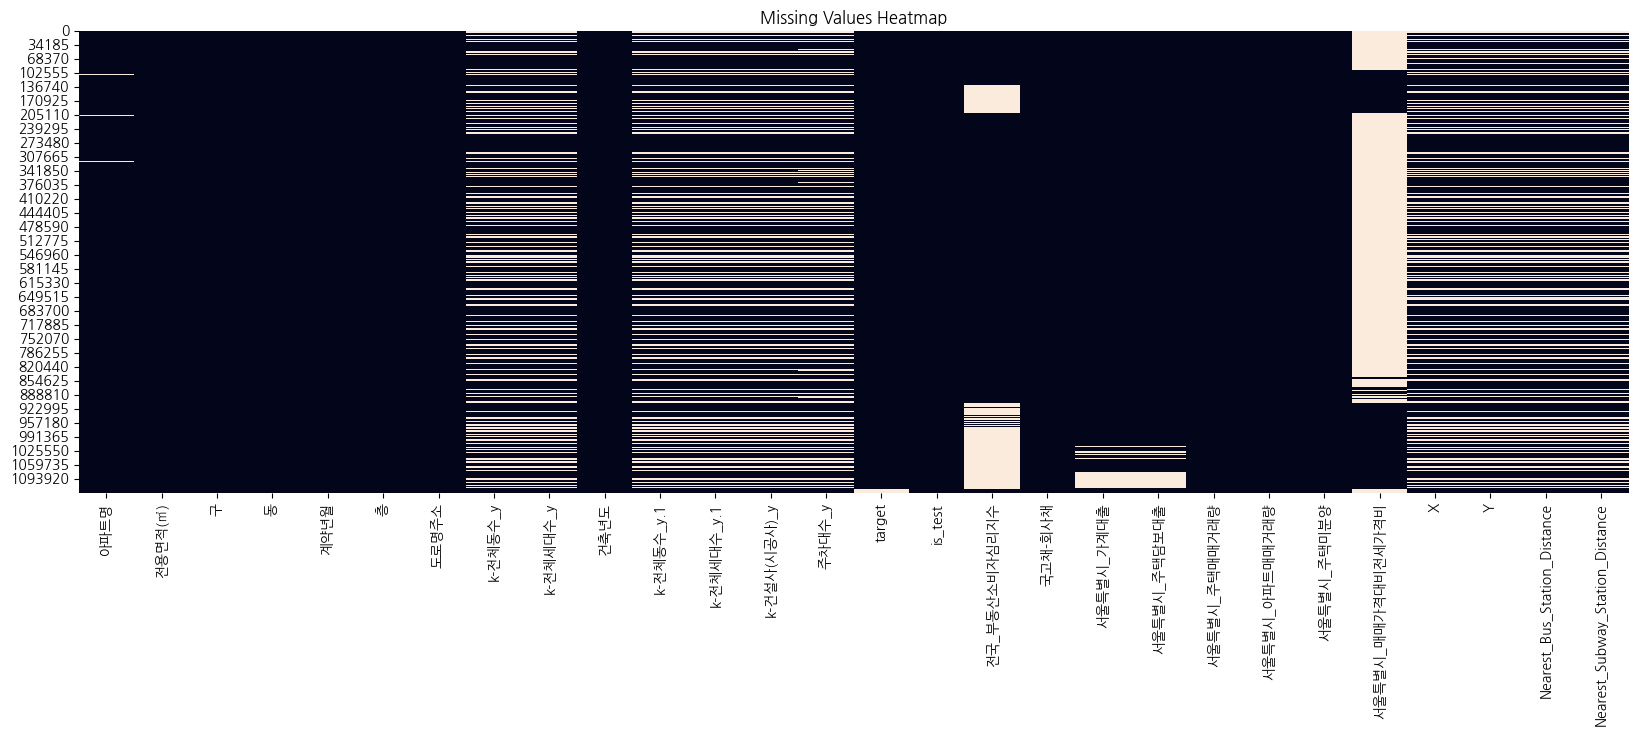

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(trainset_0714.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [21]:
train_test[['해제사유발생일','등기신청일자','계약년월일']]

,해제사유발생일,등기신청일자,계약년월일
0,NaN,,2017-12-08
1,NaN,,2017-12-22
2,NaN,,2017-12-28
3,NaN,,2018-01-03
4,NaN,,2018-01-08
...,...,...,...
1128089,20230801.0,,2023-07-19
1128090,NaN,,2023-07-25
1128091,NaN,,2023-08-27
1128092,NaN,,2023-09-02


# 학원과 target 관계: 500 m 이내여서 관게가 없어보임 ㅠ

In [31]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [32]:
trainset_0714.columns

Index(['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', '도로명주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '동도로명주소_x'],
      dtype='object')

In [ ]:
import pandas as pd

# 가정: trainset_0714 데이터프레임이 이미 정의되어 있고, 필요한 컬럼들을 포함하고 있음
# 데이터프레임의 예시 컬럼에 NaN 값을 0으로 채우고 모든 학원수의 합을 계산
trainset_0714['모든학원수'] = (
    trainset_0714['소형학원수'].fillna(0) +
    trainset_0714['중형학원수'].fillna(0) +
    trainset_0714['대형학원수'].fillna(0) +
    trainset_0714['종합학원수'].fillna(0) +
    trainset_0714['입시학원수'].fillna(0) +
    trainset_0714['외국어학원수'].fillna(0) +
    trainset_0714['예체능학원수'].fillna(0) +
    trainset_0714['독서실수'].fillna(0) +
    trainset_0714['정보학원수'].fillna(0)
)

# 결과 확인을 위한 출력 (예시로 몇 개의 행만 출력)
print(trainset_0714[['소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '모든학원수']].head())


In [72]:
gangmam_target= trainset_0714[(trainset_0714.구=='강남구')&(trainset_0714.is_test==0)&(trainset_0714['전용면적(㎡)']==84.9895)].target

In [73]:
gangmam_target.median()

nan

In [67]:
trainset_0714['전용면적(㎡)'].unique()

array([ 79.97  ,  54.98  , 133.46  , ...,  84.9895,  25.0654,  59.7446])

In [99]:
aa = trainset_0714[(trainset_0714.구=='강남구')&(trainset_0714.is_test==0)]
                   
                #    &(trainset_0714.target>=gangmam_target.median()*0.8)
                #    &(trainset_0714.target<=gangmam_target.median()*1.2)
                #    &(trainset_0714['전용면적(㎡)']==84.9895)]

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='모든학원수', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('모든학원수 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('모든학원수')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


NameError: name 'aa' is not defined

<Figure size 1000x600 with 0 Axes>

# 전용면적: 관계 분명히 있다


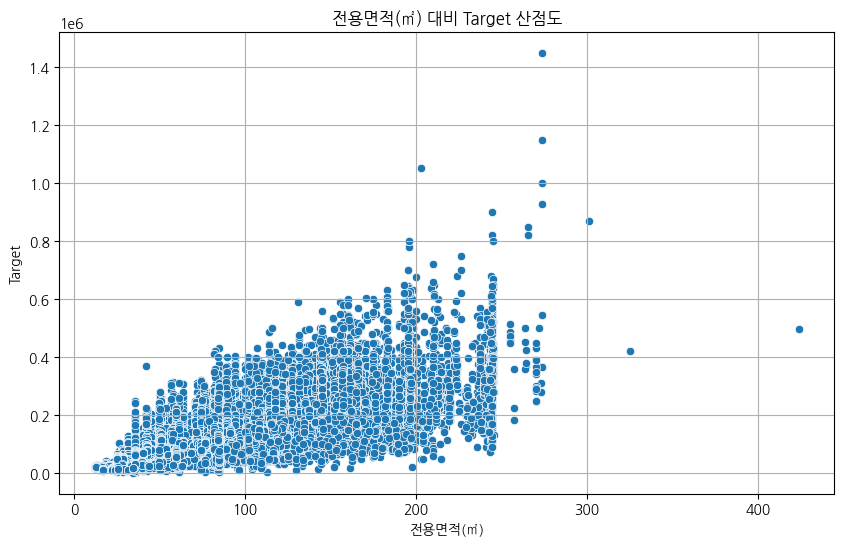

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='전용면적(㎡)', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('전용면적(㎡) 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('전용면적(㎡)')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 건축년도

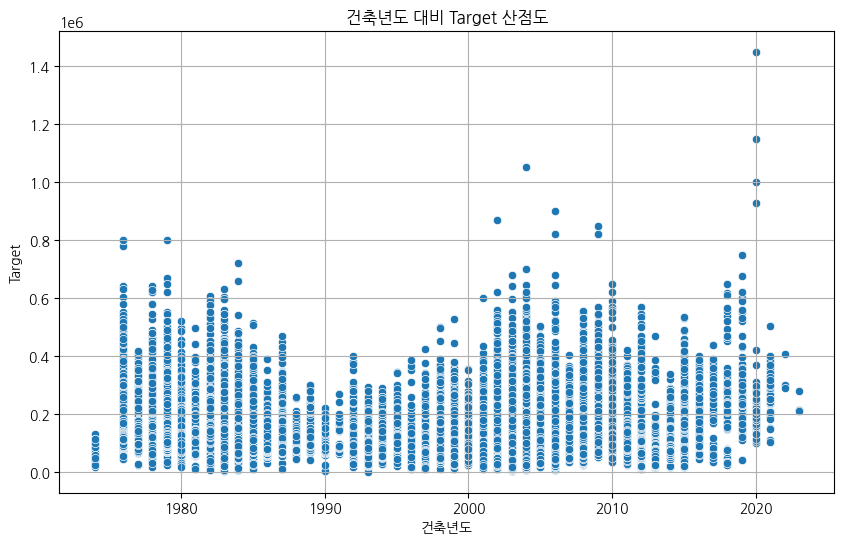

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='건축년도', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('건축년도 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('건축년도')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 국고채-회사채: 관계없음 ?? ㅠㅠ 

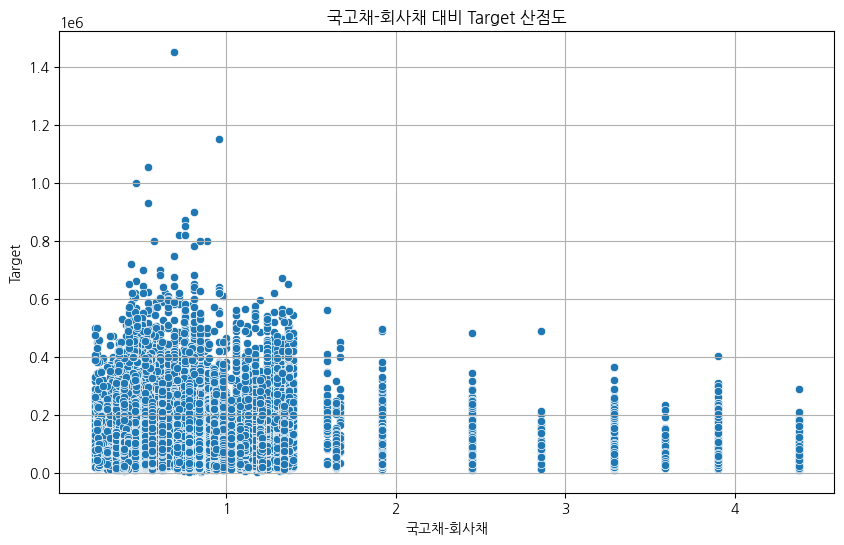

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='국고채-회사채', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('국고채-회사채 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('국고채-회사채')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 전국_부동산소비자심리지수: ?

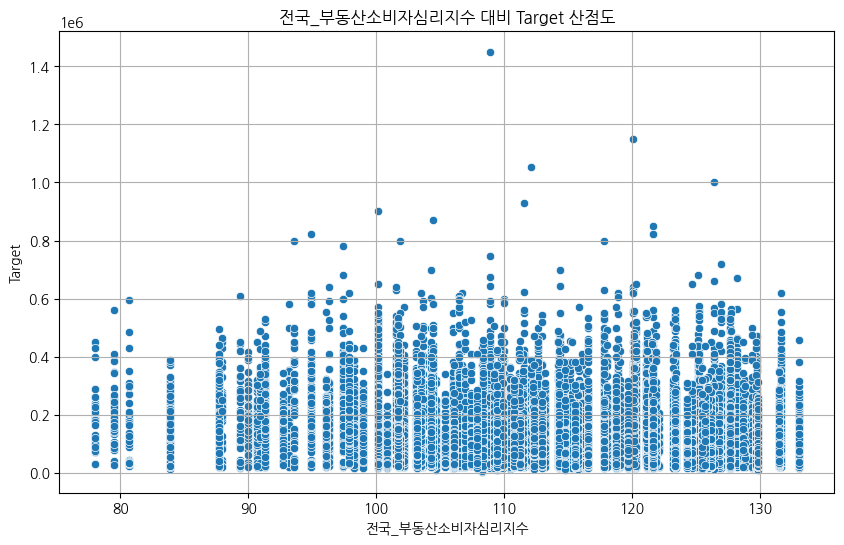

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='전국_부동산소비자심리지수', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('전국_부동산소비자심리지수 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('전국_부동산소비자심리지수')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 역 거리: 지하철역과 가까울수록 가격이 높다 버스는 상관없어보인다

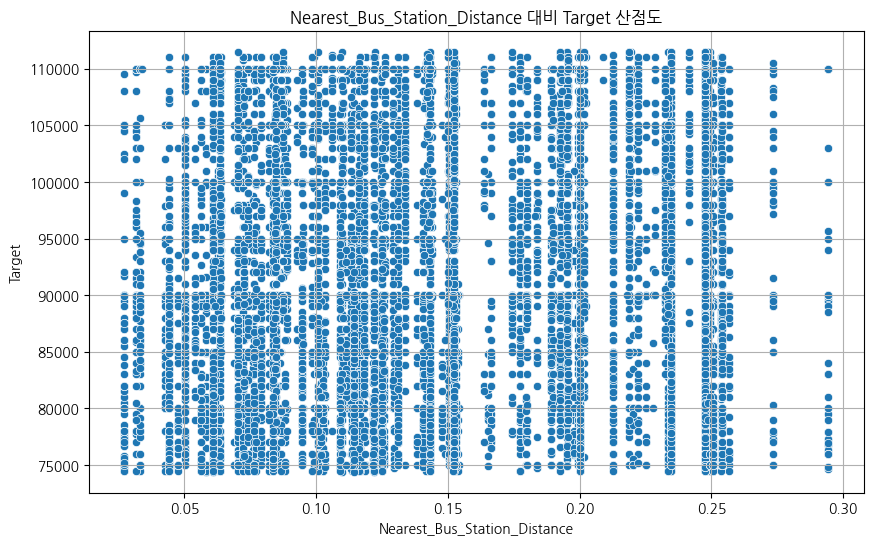

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='Nearest_Bus_Station_Distance', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('Nearest_Bus_Station_Distance 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('Nearest_Bus_Station_Distance')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


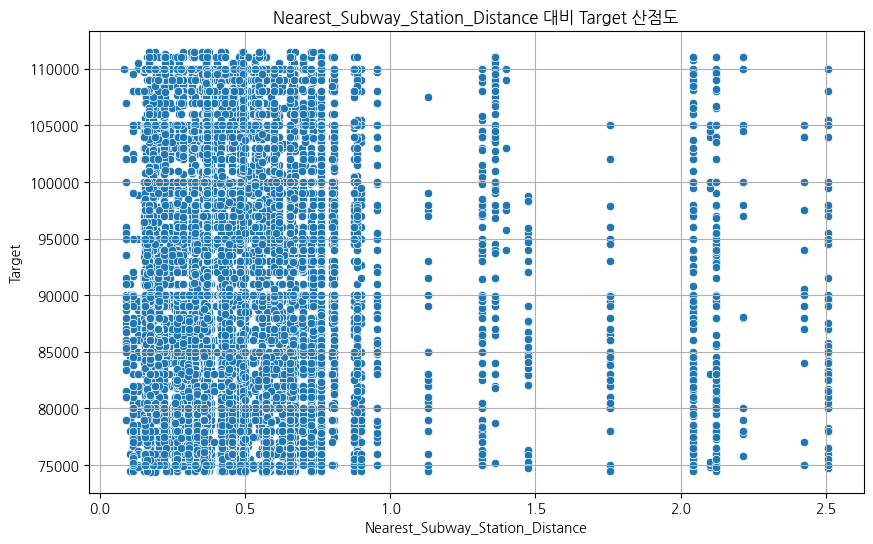

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='Nearest_Subway_Station_Distance', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('Nearest_Subway_Station_Distance 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('Nearest_Subway_Station_Distance')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 동수 세대수: 

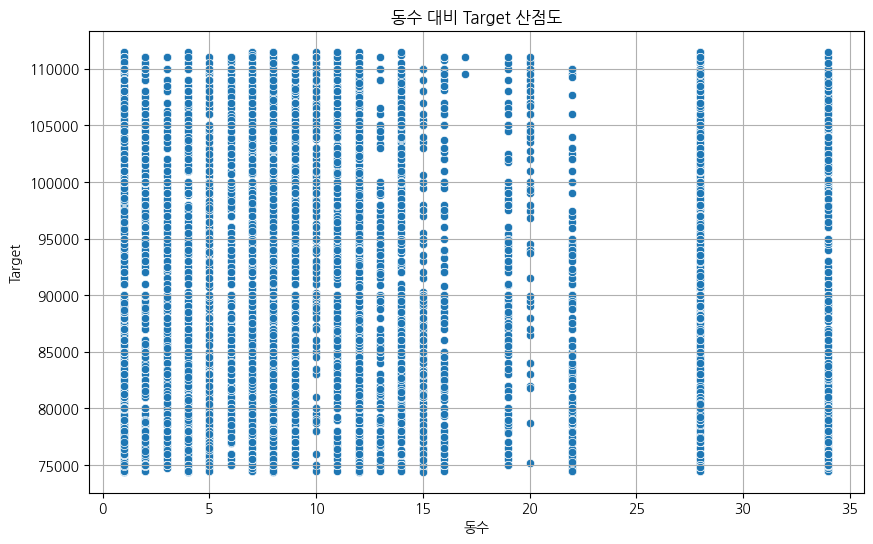

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='동수', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('동수 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('동수')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


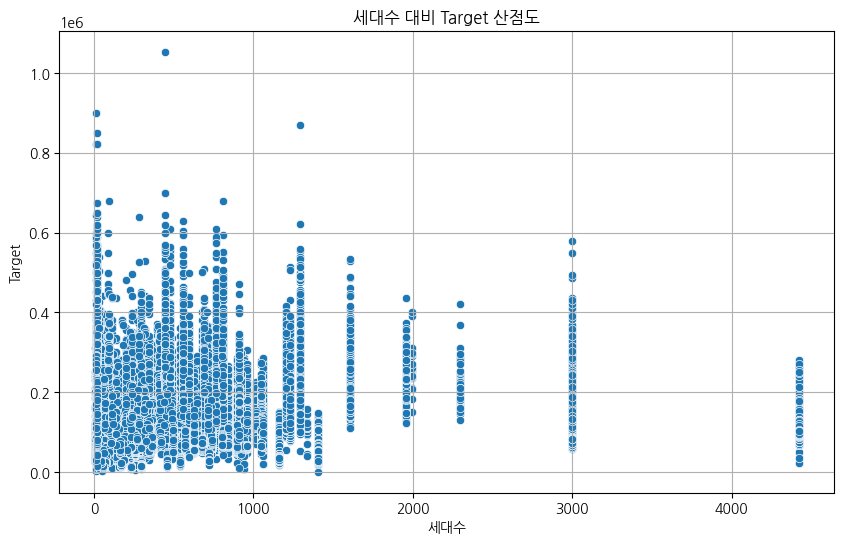

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='세대수', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('세대수 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('세대수')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


# 대장아파트 거리: ?????

In [95]:
aa.columns

Index(['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', '도로명주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '동도로명주소_x', '모든학원수'],
      dtype='object')

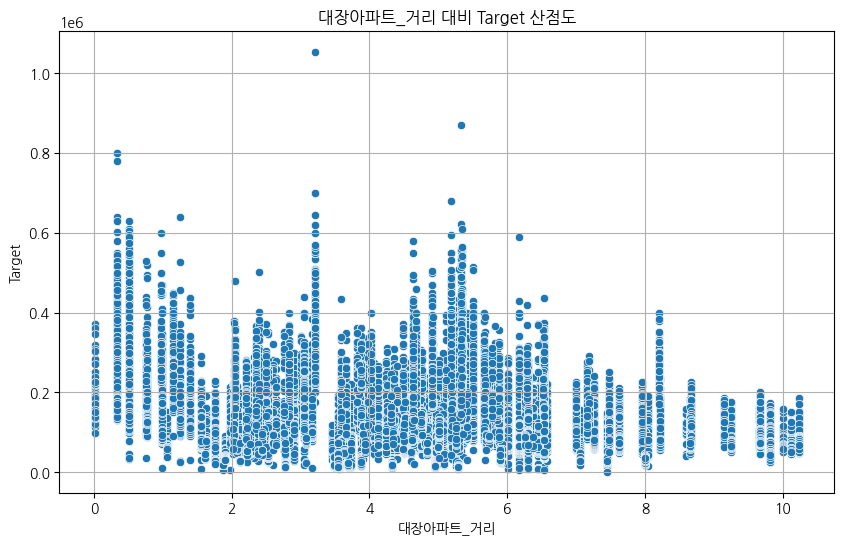

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 산점도 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정ㅁ
sns.scatterplot(x='대장아파트_거리', y='target', data=aa)  # seaborn을 사용한 산점도
plt.title('대장아파트_거리 대비 Target 산점도')  # 그래프 제목 설정
plt.xlabel('대장아파트_거리')  # X축 라벨
plt.ylabel('Target')  # Y축 라벨
plt.grid(True)  # 그리드 추가
plt.show()


## outlier 관계